In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import torch

In [3]:
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['text.usetex'] = False
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)
mpl.rcParams['figure.dpi'] = 300

In [4]:
import sys
sys.path.append("..")

In [5]:
# Import the various experiments we need for the notebook
from sva.experiments import NegatedGramacyLeeFunction, SimpleSigmoid, WavySinusoidalGPaxHighFidelity

# Import the helper functions for Gaussian Processes
from sva.models.gp import single_task_gp

torch default dtype set to torch.float64


/Users/mc/miniforge3/envs/py3.11-sva/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
f = WavySinusoidalGPaxHighFidelity()
campaign = single_task_gp.Campaign(experiment=f, seed=126, predict_every=None)

In [27]:
campaign.initialize_data(n=1, protocol="random")

In [28]:
campaign.run(n_experiments=40)

/Users/mc/miniforge3/envs/py3.11-sva/lib/python3.11/site-packages/botorch/optim/initializers.py:403: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


In [29]:
len(campaign.record)

40

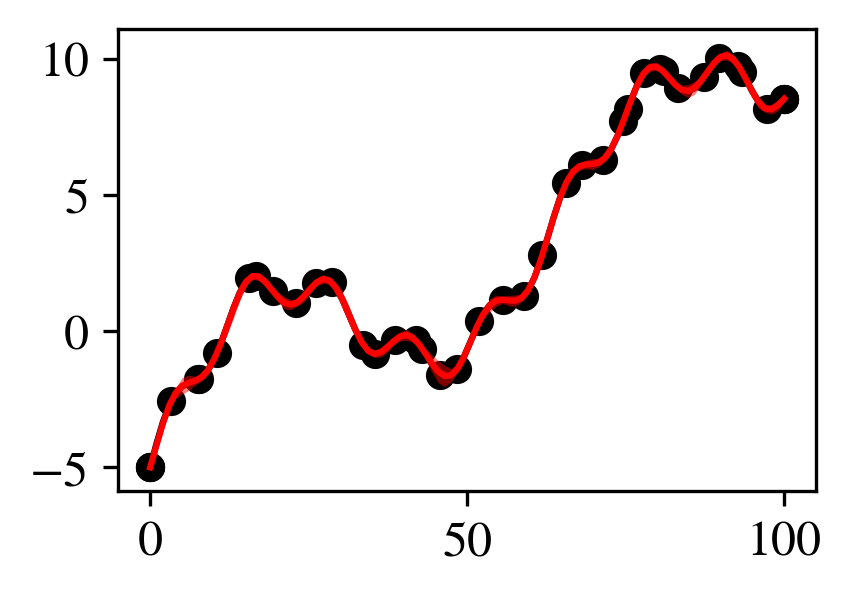

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2))

ax.scatter(campaign.experiment.data.X.squeeze(), campaign.experiment.data.Y.squeeze(), color="black")
ax.plot(campaign.dense_grid.squeeze(), f(campaign.dense_grid).squeeze(), color="black")
ax.plot(campaign.dense_grid.squeeze(), campaign.record[-1]["mu"], color="red", zorder=3)
ax.fill_between(
    campaign.dense_grid.squeeze(),
    campaign.record[-1]["mu"].squeeze()-campaign.record[-1]["sd"].squeeze()*2,
    campaign.record[-1]["mu"].squeeze()+campaign.record[-1]["sd"].squeeze()*2,
    color="red", alpha=0.5, linewidth=0, zorder=3
)


plt.show()

In [33]:
np.array(
            [[-4.0, 5.0], [-5.0, 4.0]]
        ).T

array([[-4., -5.],
       [ 5.,  4.]])